<a href="https://colab.research.google.com/github/JoshMcConkie/control-lab/blob/main/CartPole/cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



In [ ]:
m_cart = 1
m_p = 1

x_dot = 0
x = 0
theta = 0
theta_dot = 0
tstep = .1
F_x = 1

state = [x,x_dot, theta,theta_dot]

theta_acc = f(theta, F_x)
x_acc = g(theta,F_x)

new_x = x + x_dot * tstep
new_x_dot = x_dot + x_acc * tstep
new_theta = theta + theta_dot * tstep
new_theta_dot = theta_dot + theta_acc * tstep




/usr/local/lib/python3.11/dist-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `time_eval`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


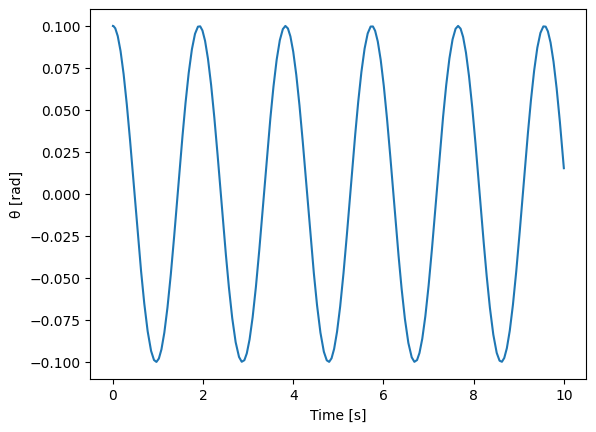

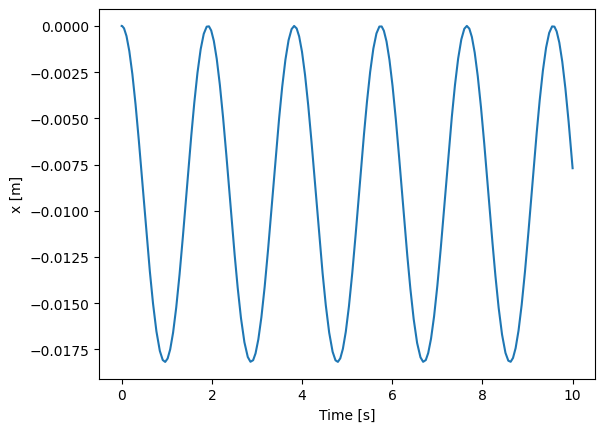

In [5]:
# Derived equations for the cartpole system (linearized)

# Controller: PD. Integral term is uneccessary because the inverted pendulum is
# a constant state of instablility
m_cart = 1 #kg
m_p = .1   #kg
length = 1 #m
g = -9.8

P = 100
D = 10

def cartpole_sys(t, state):
  x, x_dot, theta, theta_dot = state
  # Force increases when theta increases
  x_force = 0

  theta_ddot = (m_cart + m_p)*g/length*theta + x_force/(m_cart*length)
  x_ddot = (m_p/m_cart)*g*theta+x_force/m_cart

  return [x_dot, x_ddot, theta_dot, theta_ddot]



time_span = (0.0, 10.0)
time_eval = np.linspace(0, 10, 500)
y_0 = [0.0,0.0,0.1,0.0]

sol = solve_ivp(cartpole_sys, time_span, y_0, time_eval=time_eval, rtol=1e-6, atol=1e-9)

plt.plot(sol.t, sol.y[2])       # theta vs time
plt.xlabel('Time [s]'); plt.ylabel('θ [rad]')
plt.show()

plt.plot(sol.t, sol.y[0])       # cart position vs time
plt.xlabel('Time [s]'); plt.ylabel('x [m]')
plt.show()

